In [1]:
# pip install umap-learn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.datasets import load_iris

## 1. This part is for the Iris dataset that has only 4 features

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

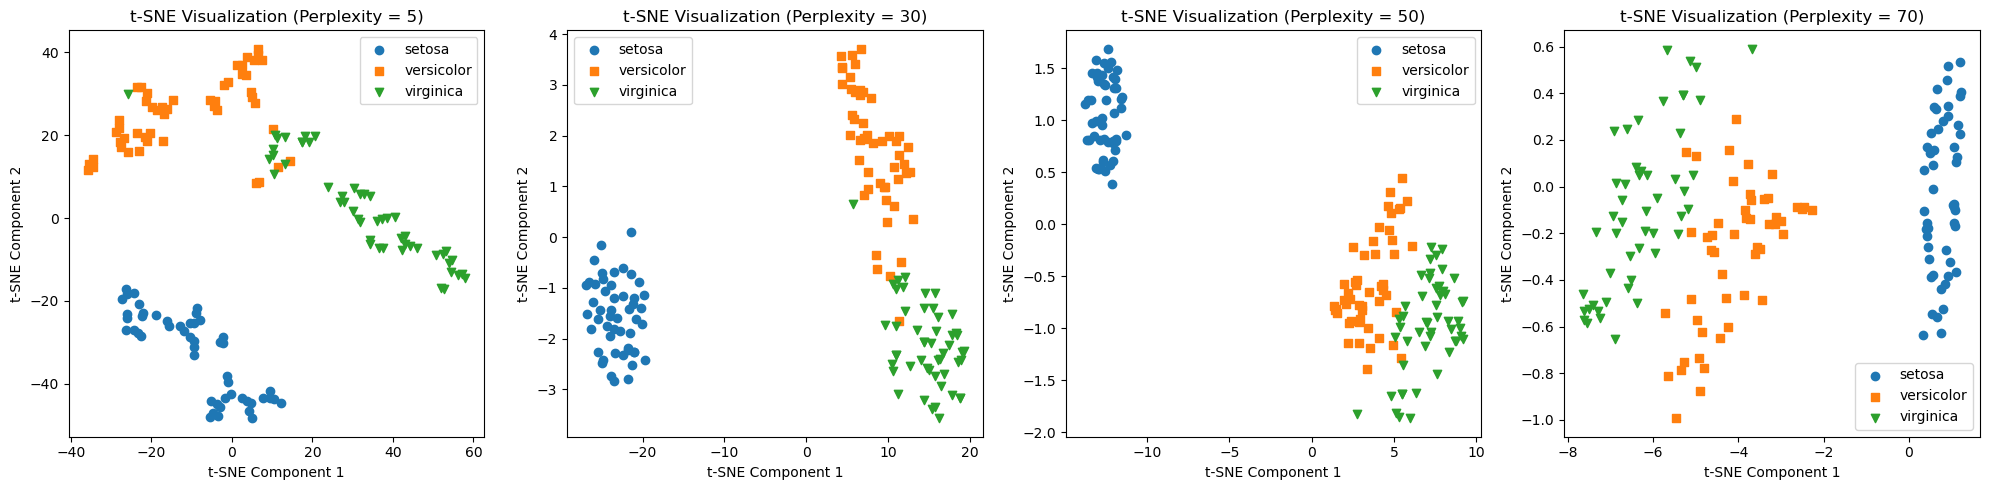

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Define a list of perplexity values to use for t-SNE
perplexity_values = [5, 30, 50, 70]

# Define a list of marker shapes for each class
marker_shapes = ['o', 's', 'v']
print(X)

# Apply t-SNE for dimensionality reduction with different perplexity values and marker shapes
plt.figure(figsize=(20, 5))
for idx, perplexity in enumerate(perplexity_values):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X)

    # Create a DataFrame for t-SNE results
    df_tsne = pd.DataFrame(data=X_tsne, columns=["x_coors", "y_coors"])
    df_tsne["target"] = y

    # Plot t-SNE results with different perplexity values and marker shapes
    plt.subplot(1, len(perplexity_values), idx + 1)
    for i, target_name in enumerate(target_names):
        marker_shape = marker_shapes[i % len(marker_shapes)]
        plt.scatter(df_tsne.loc[df_tsne['target'] == i, 'x_coors'], df_tsne.loc[df_tsne['target'] == i, 'y_coors'], label=target_name, marker=marker_shape)

    plt.title(f"t-SNE Visualization (Perplexity = {perplexity})")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.legend()

plt.tight_layout()

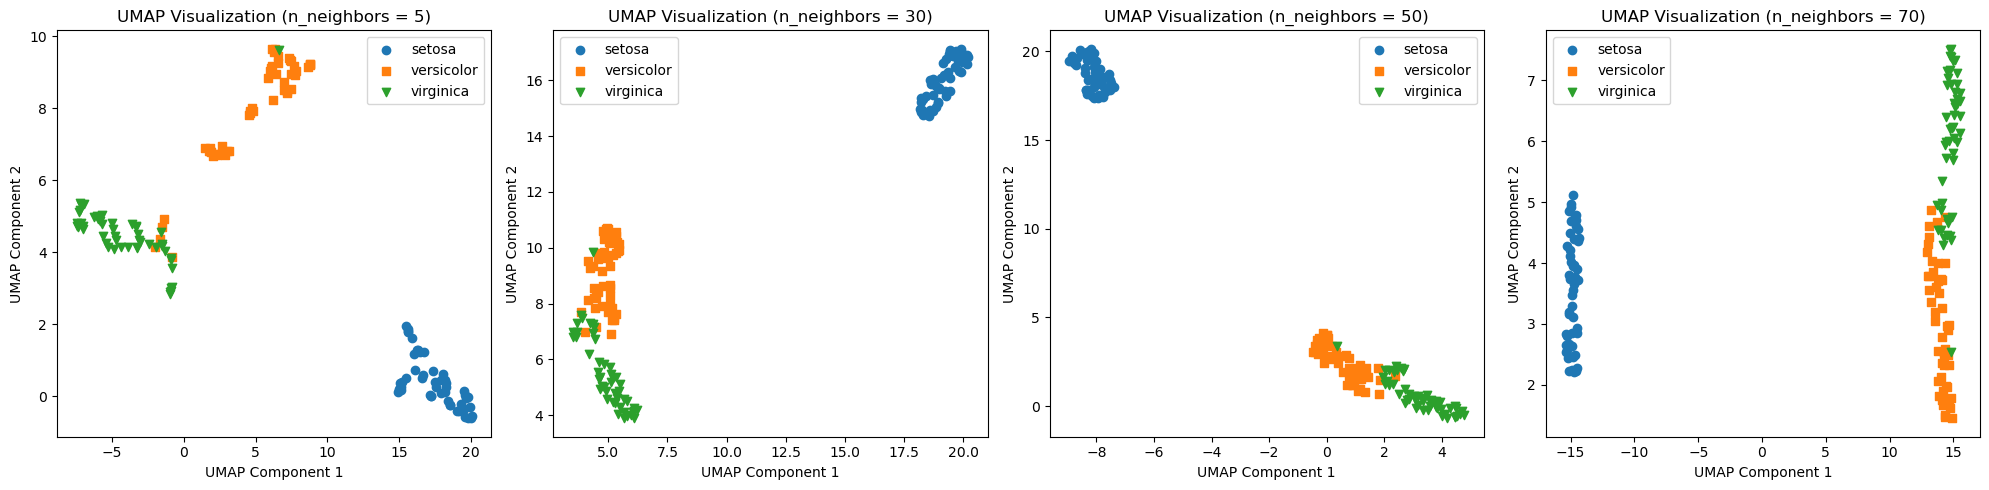

In [4]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Define a list of neighbor values to use for UMAP
neighbor_values = [5, 30, 50, 70]

# Define a list of marker shapes for each class
marker_shapes = ['o', 's', 'v']

# Apply UMAP for dimensionality reduction with different neighbor values and marker shapes
plt.figure(figsize=(20, 5))
for idx, n_neighbors in enumerate(neighbor_values):
    umap_model = umap.UMAP(n_components=2, n_neighbors=n_neighbors)
    X_umap = umap_model.fit_transform(X)

    # Create a DataFrame for UMAP results
    df_umap = pd.DataFrame(data=X_umap, columns=["x_coors", "y_coors"])
    df_umap["target"] = y

    # Plot UMAP results with different neighbor values and marker shapes
    plt.subplot(1, len(neighbor_values), idx + 1)
    for i, target_name in enumerate(target_names):
        marker_shape = marker_shapes[i % len(marker_shapes)]
        plt.scatter(df_umap.loc[df_umap['target'] == i, 'x_coors'], df_umap.loc[df_umap['target'] == i, 'y_coors'], label=target_name, marker=marker_shape)

    plt.title(f"UMAP Visualization (n_neighbors = {n_neighbors})")
    plt.xlabel("UMAP Component 1")
    plt.ylabel("UMAP Component 2")
    plt.legend()

plt.tight_layout()

## 2. This part is for dataset that has more than 10 features

##### Read the Fm3m.csv dataset to a dataframe named AB_compound_df, set index_col = 0

In [5]:
AB_compound_df = pd.read_csv("Fm3m.csv", index_col=0)
AB_compound_df.head()

,volumne,Formation_energy,Band_gap,A_e_negativity,A_valence_e,A_first_ionization,A_boiling_point,A_melting_point,A_atomic_radius,A_average_ionic_radius,B_e_negativity,B_valence_e,B_first_ionization,B_boiling_point,B_melting_point,B_atomic_radius,B_average_ionic_radius
#compound,,,,,,,,,,,,,,,,,
CsF,57.249,-2.877,5.260,0.79,1,3.894,944.0,301.59,2.6,1.81,3.98,7,17.422,85.03,53.53,0.50,0.705000
CsCl,88.049,-2.265,4.849,0.79,1,3.894,944.0,301.59,2.6,1.81,3.16,7,12.967,239.11,171.60,1.00,0.780000
CsBr,101.392,-1.811,4.258,0.79,1,3.894,944.0,301.59,2.6,1.81,2.96,7,11.814,332.00,265.80,1.15,0.882500
CsI,121.359,-1.568,3.857,0.79,1,3.894,944.0,301.59,2.6,1.81,2.66,7,10.451,457.40,386.85,1.40,1.273333
KF,39.893,-2.956,5.996,0.82,1,4.341,1032.0,336.53,2.2,1.52,3.98,7,17.422,85.03,53.53,0.50,0.705000


In [6]:
print("Number of columns:",len(AB_compound_df.columns))
AB_compound_df.columns

Number of columns: 17


Index(['volumne', 'Formation_energy', 'Band_gap', 'A_e_negativity',
       'A_valence_e', 'A_first_ionization', 'A_boiling_point',
       'A_melting_point', 'A_atomic_radius', 'A_average_ionic_radius',
       'B_e_negativity', 'B_valence_e', 'B_first_ionization',
       'B_boiling_point', 'B_melting_point', 'B_atomic_radius',
       'B_average_ionic_radius'],
      dtype='object')

In [7]:
AB_compound_df.describe()

,volumne,Formation_energy,Band_gap,A_e_negativity,A_valence_e,A_first_ionization,A_boiling_point,A_melting_point,A_atomic_radius,A_average_ionic_radius,B_e_negativity,B_valence_e,B_first_ionization,B_boiling_point,B_melting_point,B_atomic_radius,B_average_ionic_radius
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,42.384088,-1.154996,0.736828,1.401423,3.033473,6.418964,2885.542427,1425.787238,1.688703,1.044168,2.686695,5.531381,11.569017,996.324728,756.016025,0.940167,0.826133
std,19.031528,1.163812,1.616213,0.411632,1.392857,1.213798,1192.019343,742.435945,0.275883,0.236881,0.474491,0.878106,2.201514,1266.675468,1105.407212,0.280826,0.316874
min,12.149000,-3.649000,0.001000,0.790000,1.000000,3.894000,629.880000,234.320000,1.050000,0.590000,2.040000,3.000000,8.298000,77.360000,53.530000,0.500000,0.300000
25%,25.807000,-1.861000,0.001000,1.120000,2.000000,5.580000,1818.500000,1000.000000,1.450000,0.860000,2.190000,5.000000,9.810000,90.200000,63.050000,0.650000,0.630000
50%,42.813000,-1.497000,0.001000,1.240000,3.000000,6.113000,2993.000000,1345.000000,1.750000,1.041000,2.550000,6.000000,10.486000,717.870000,388.360000,1.000000,0.780000
75%,53.125500,-0.340000,0.119500,1.655000,4.000000,7.289000,3609.000000,1814.000000,1.850000,1.160000,3.040000,6.000000,13.618000,958.000000,722.660000,1.150000,1.013333
max,121.359000,2.238000,8.716000,2.540000,7.000000,10.437000,5869.000000,3695.000000,2.600000,1.810000,3.980000,7.000000,17.422000,4300.000000,3800.000000,1.400000,1.293333


##### Load the distance matrix, save to dm_normed

This distance matrix contains dissimilarity between pairwise compounds in the dataset. I have computed and normalized it

In [8]:
dm_normed = np.loadtxt("distance_matrix_normalize_max.txt")
dm_normed.shape

(239, 239)

##### Run UMAP for the distance matrix
Hint: Use the parameter metric='precomputed' in UMAP, then save the coordinates of all data points gerenated by UMAP to a txt file named arr_embedding.txt 

In [17]:
umap_model = umap.UMAP(n_neighbors=100, min_dist=0.2, n_components=2, metric='precomputed')
umap_coords = umap_model.fit_transform(dm_normed)
np.savetxt("arr_embedding.txt", umap_coords)

c:\Users\it08d\.conda\envs\eda_f2023\lib\site-packages\umap\umap_.py:1857: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


##### Plot a scatter of Umap coords obtained from the previous steps

c:\Users\it08d\.conda\envs\eda_f2023\lib\site-packages\seaborn\utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
c:\Users\it08d\.conda\envs\eda_f2023\lib\site-packages\seaborn\relational.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


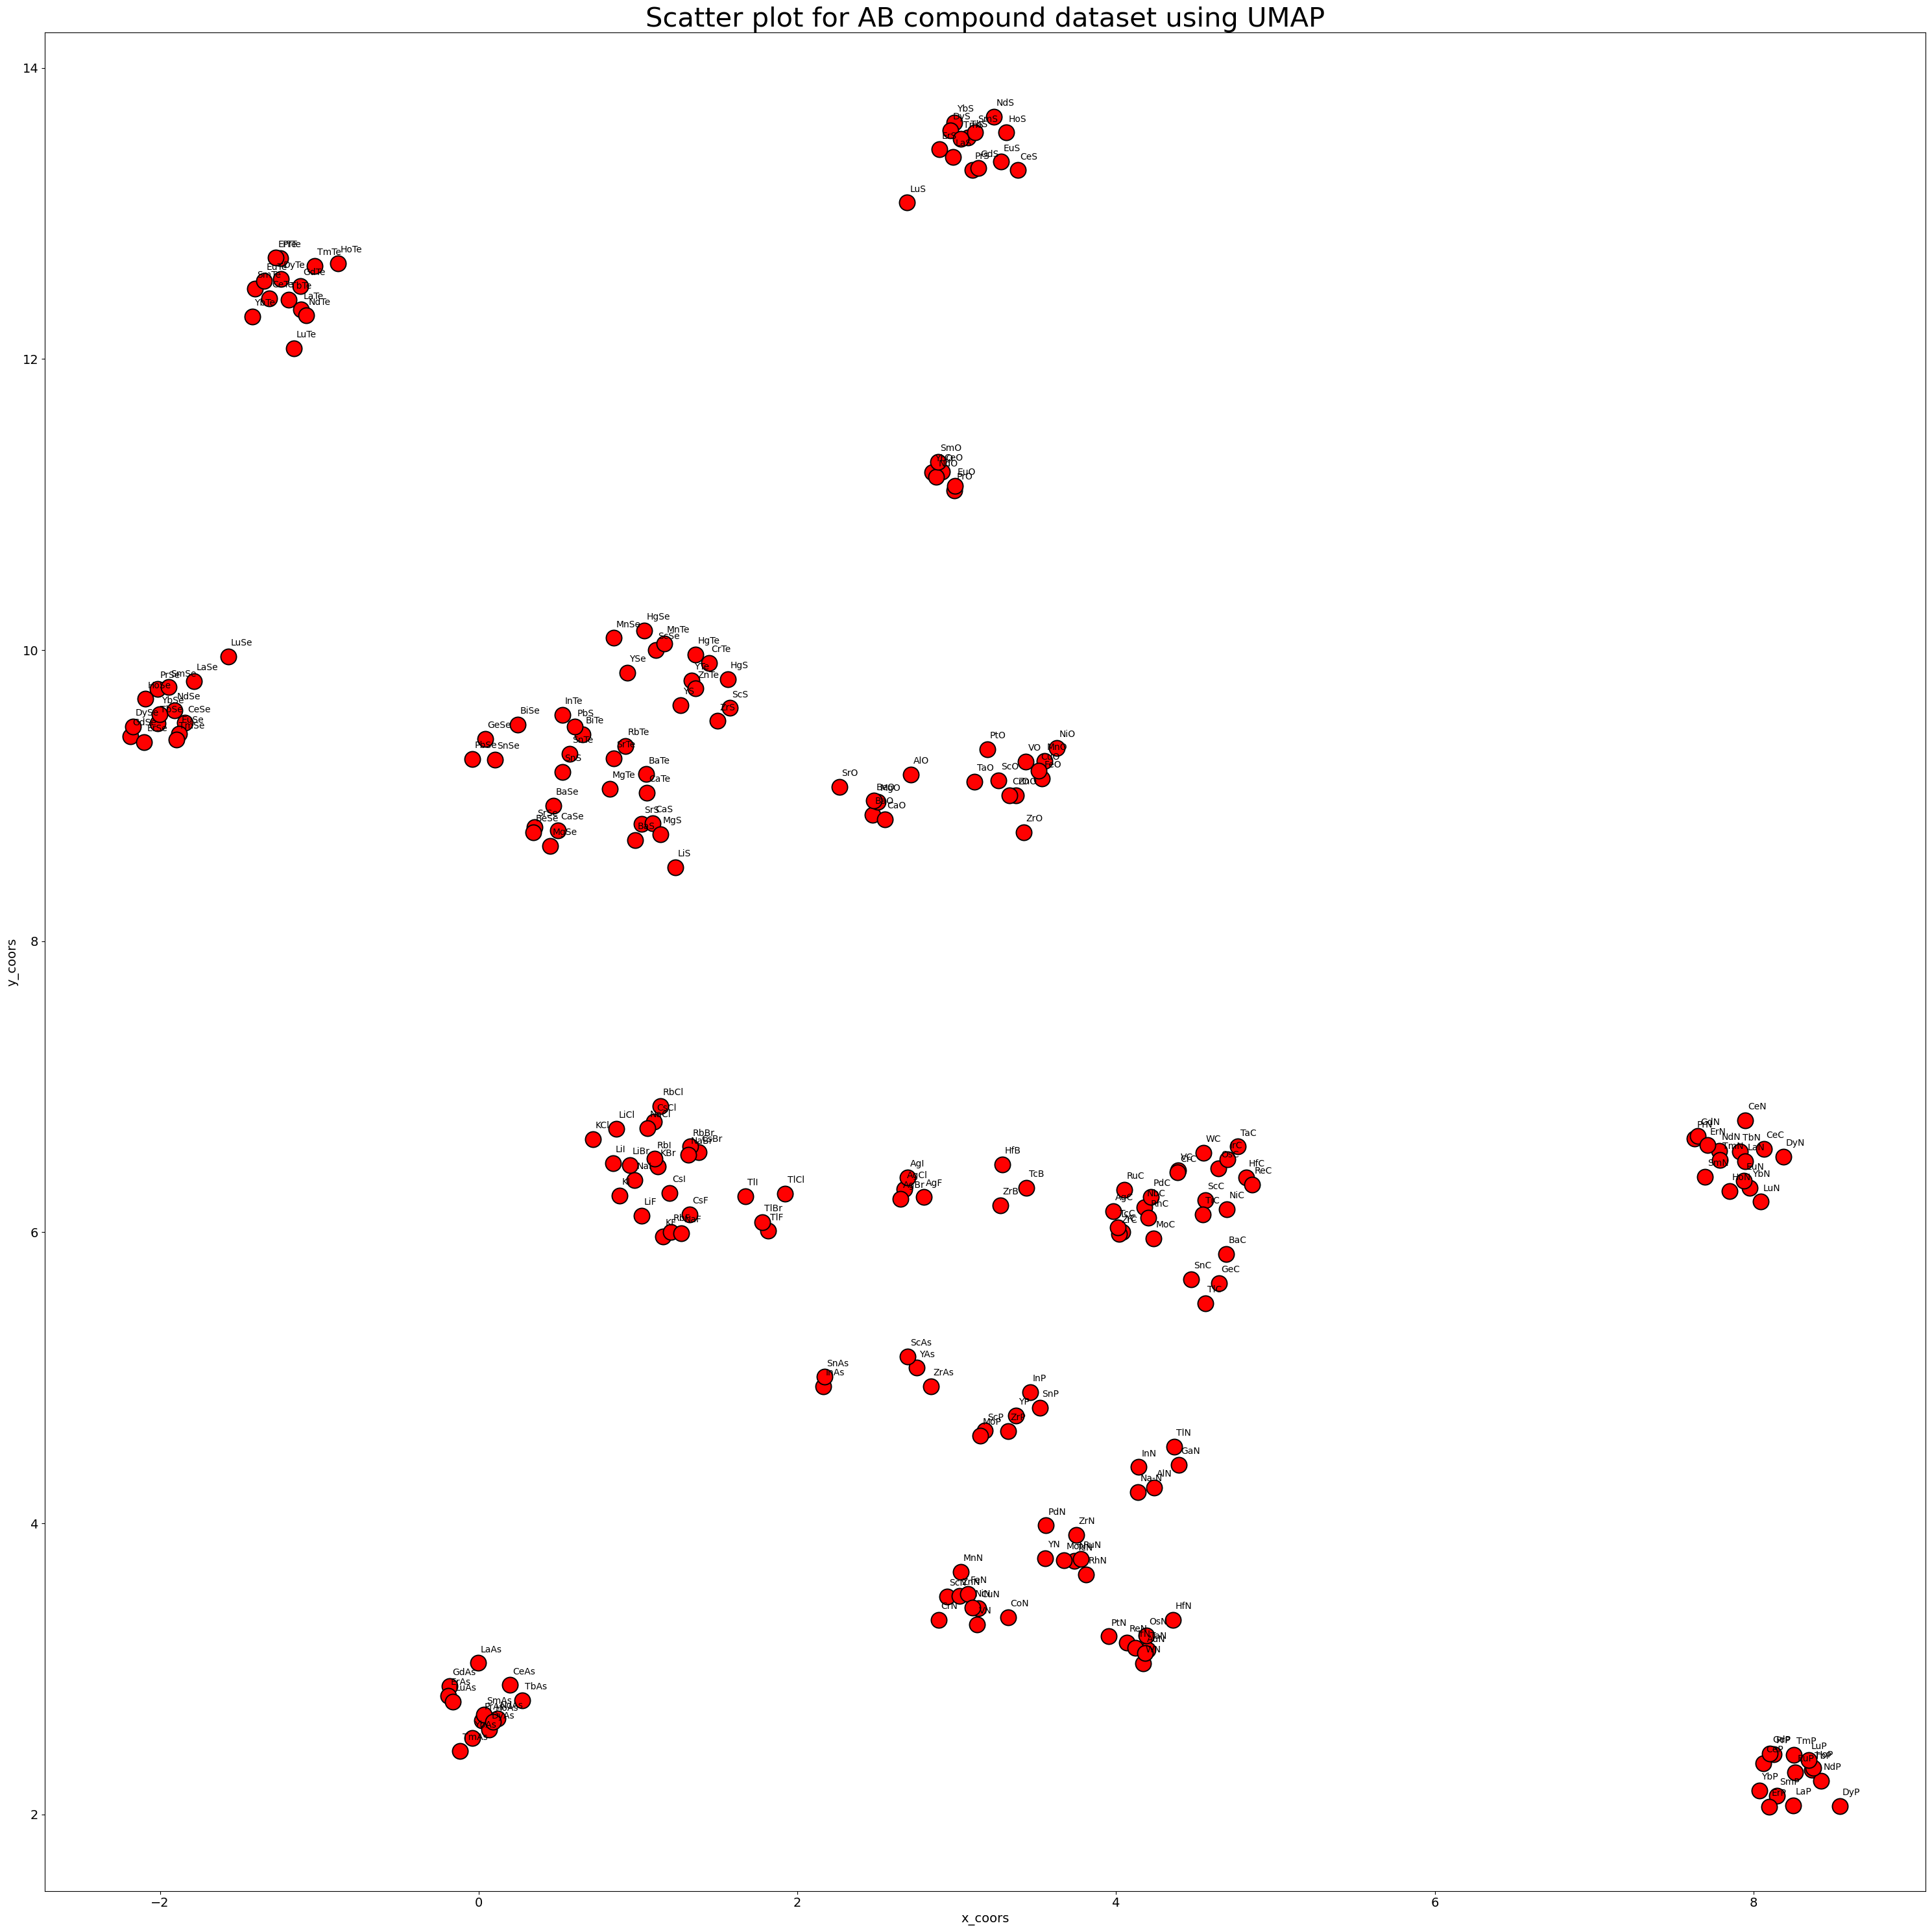

C:\Users\it08d\AppData\Local\Temp\ipykernel_19096\1376399563.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_embedding.x_coors, y=df_embedding.y_coors, cmap="Blues", shade=True)
c:\Users\it08d\.conda\envs\eda_f2023\lib\site-packages\seaborn\utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
c:\Users\it08d\.conda\envs\eda_f2023\lib\site-packages\seaborn\relational.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


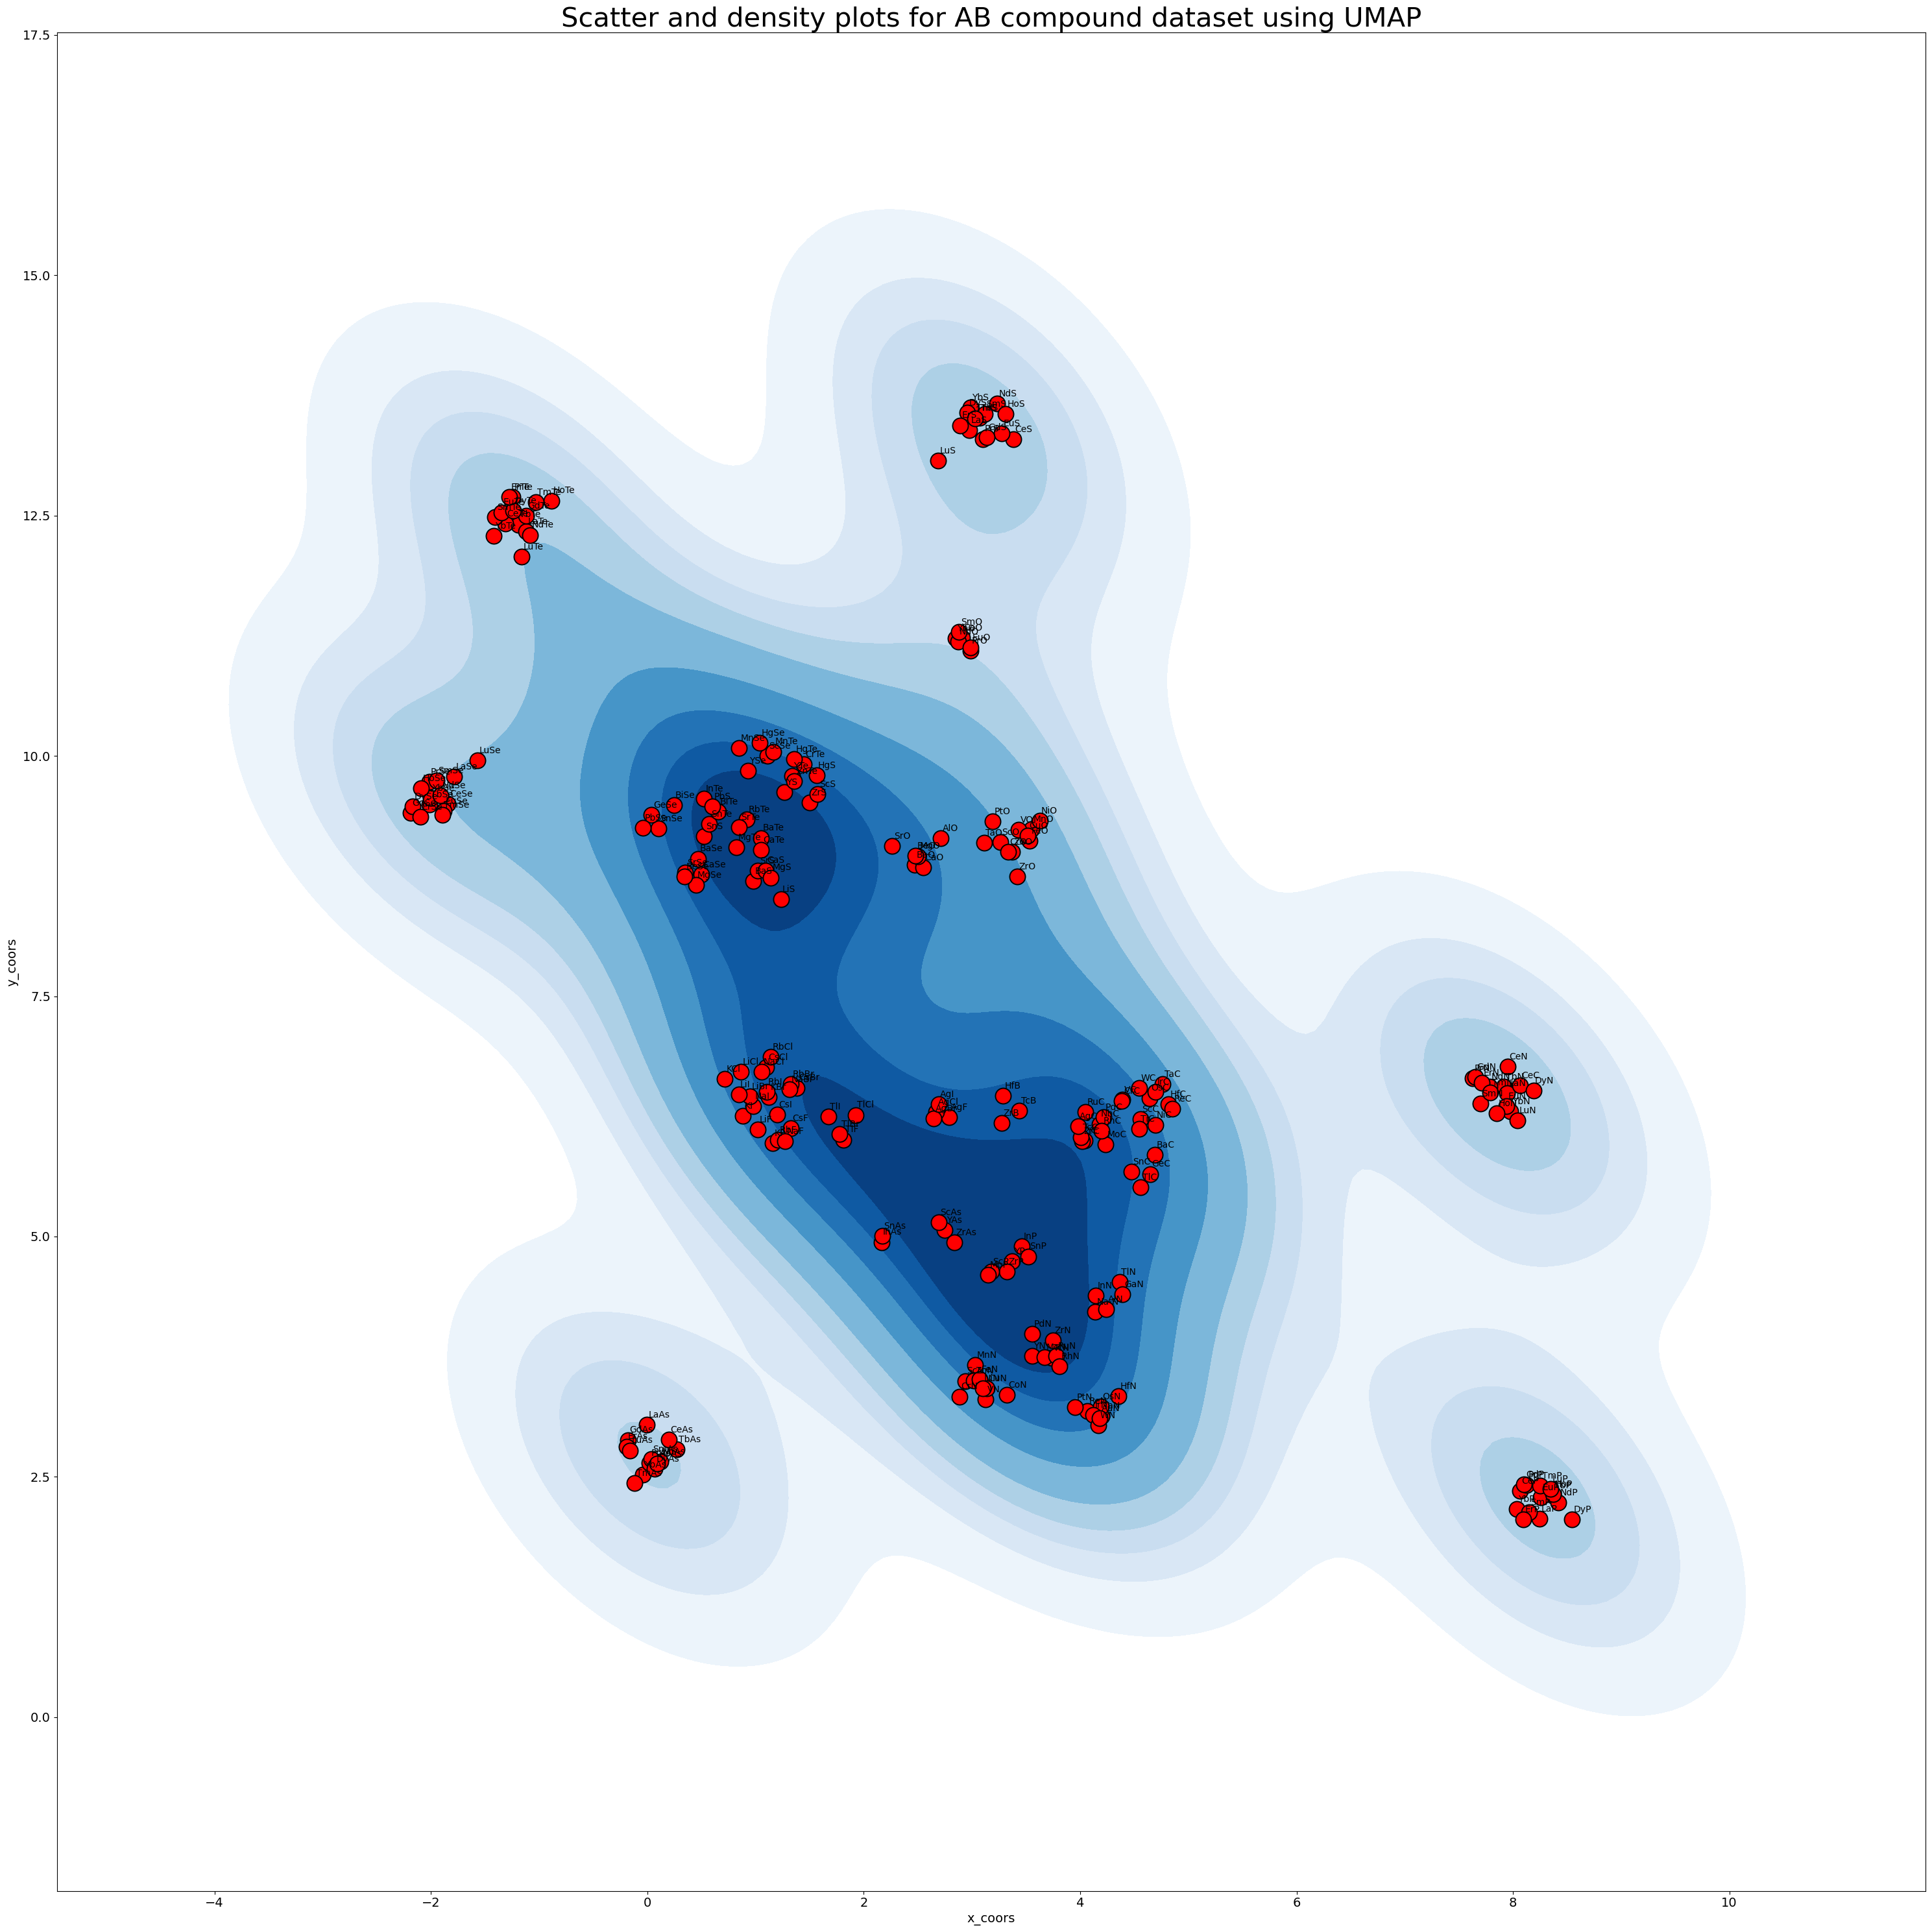

In [18]:
# Set plot configurations
plt.rcParams['figure.figsize'] = [30, 30]
plt.rc('font', size=14)

# Create a DataFrame with UMAP coordinates
df_embedding = pd.DataFrame(umap_coords, columns=["x_coors", "y_coors"])
df_embedding["compound"] = AB_compound_df.index

# Save the DataFrame to CSV
df_embedding.to_csv("df_embedding.csv", index=False)

# Plot the first figure (scatter plot)
fig, ax = plt.subplots()
sns.scatterplot(data=df_embedding, x="x_coors", y="y_coors", s=300, facecolors='red', edgecolor='black', cmap='Spectral')
for ith, row in df_embedding.iterrows():
    x = df_embedding.loc[ith, "x_coors"]
    y = df_embedding.loc[ith, "y_coors"]
    ax.text(x + 0.015, y + 0.075, str(df_embedding.loc[ith, "compound"]), size=10, zorder=1, color='black')

plt.title("Scatter plot for AB compound dataset using UMAP", size=30)
plt.tight_layout()
plt.show()

# Plot the second figure (scatter plot with KDE overlay)
fig, ax = plt.subplots()
sns.kdeplot(x=df_embedding.x_coors, y=df_embedding.y_coors, cmap="Blues", shade=True)
sns.scatterplot(data=df_embedding, x="x_coors", y="y_coors", s=300, facecolors='red', edgecolor='black', cmap='Spectral')
for ith, row in df_embedding.iterrows():
    x = df_embedding.loc[ith, "x_coors"]
    y = df_embedding.loc[ith, "y_coors"]
    ax.text(x + 0.015, y + 0.075, str(df_embedding.loc[ith, "compound"]), size=10, zorder=1, color='black')

plt.title("Scatter and density plots for AB compound dataset using UMAP", size=30)
plt.tight_layout()

##### Read the file df_embedding.csv into a dataframe, set the column "compound" as its index

In [4]:
df_embedding = pd.read_csv("df_embedding.csv", index_col=2)
df_embedding.head()

,x_coors,y_coors
compound,,
CsF,1.324901,6.124044
CsCl,1.101633,6.761290
CsBr,1.382475,6.548462
CsI,1.197788,6.270951
KF,1.157841,5.970362


##### Plot a heatmap

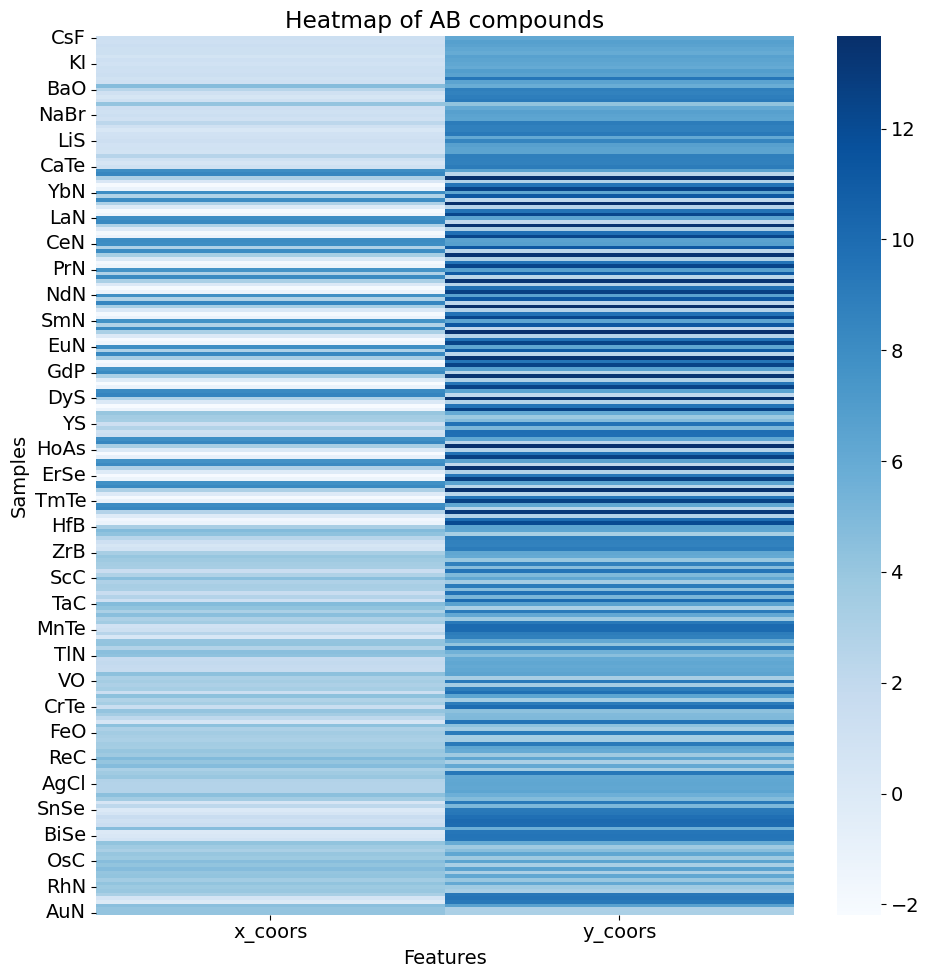

In [20]:
plt.rcParams["figure.figsize"] = (10, 10)

# Plotting the heatmap
sns.heatmap(df_embedding, cmap="Blues")

plt.title("Heatmap of AB compounds")
plt.xlabel("Features")
plt.ylabel("Samples")

plt.tight_layout()

#### Plot HAC and radialTree

<Axes: >

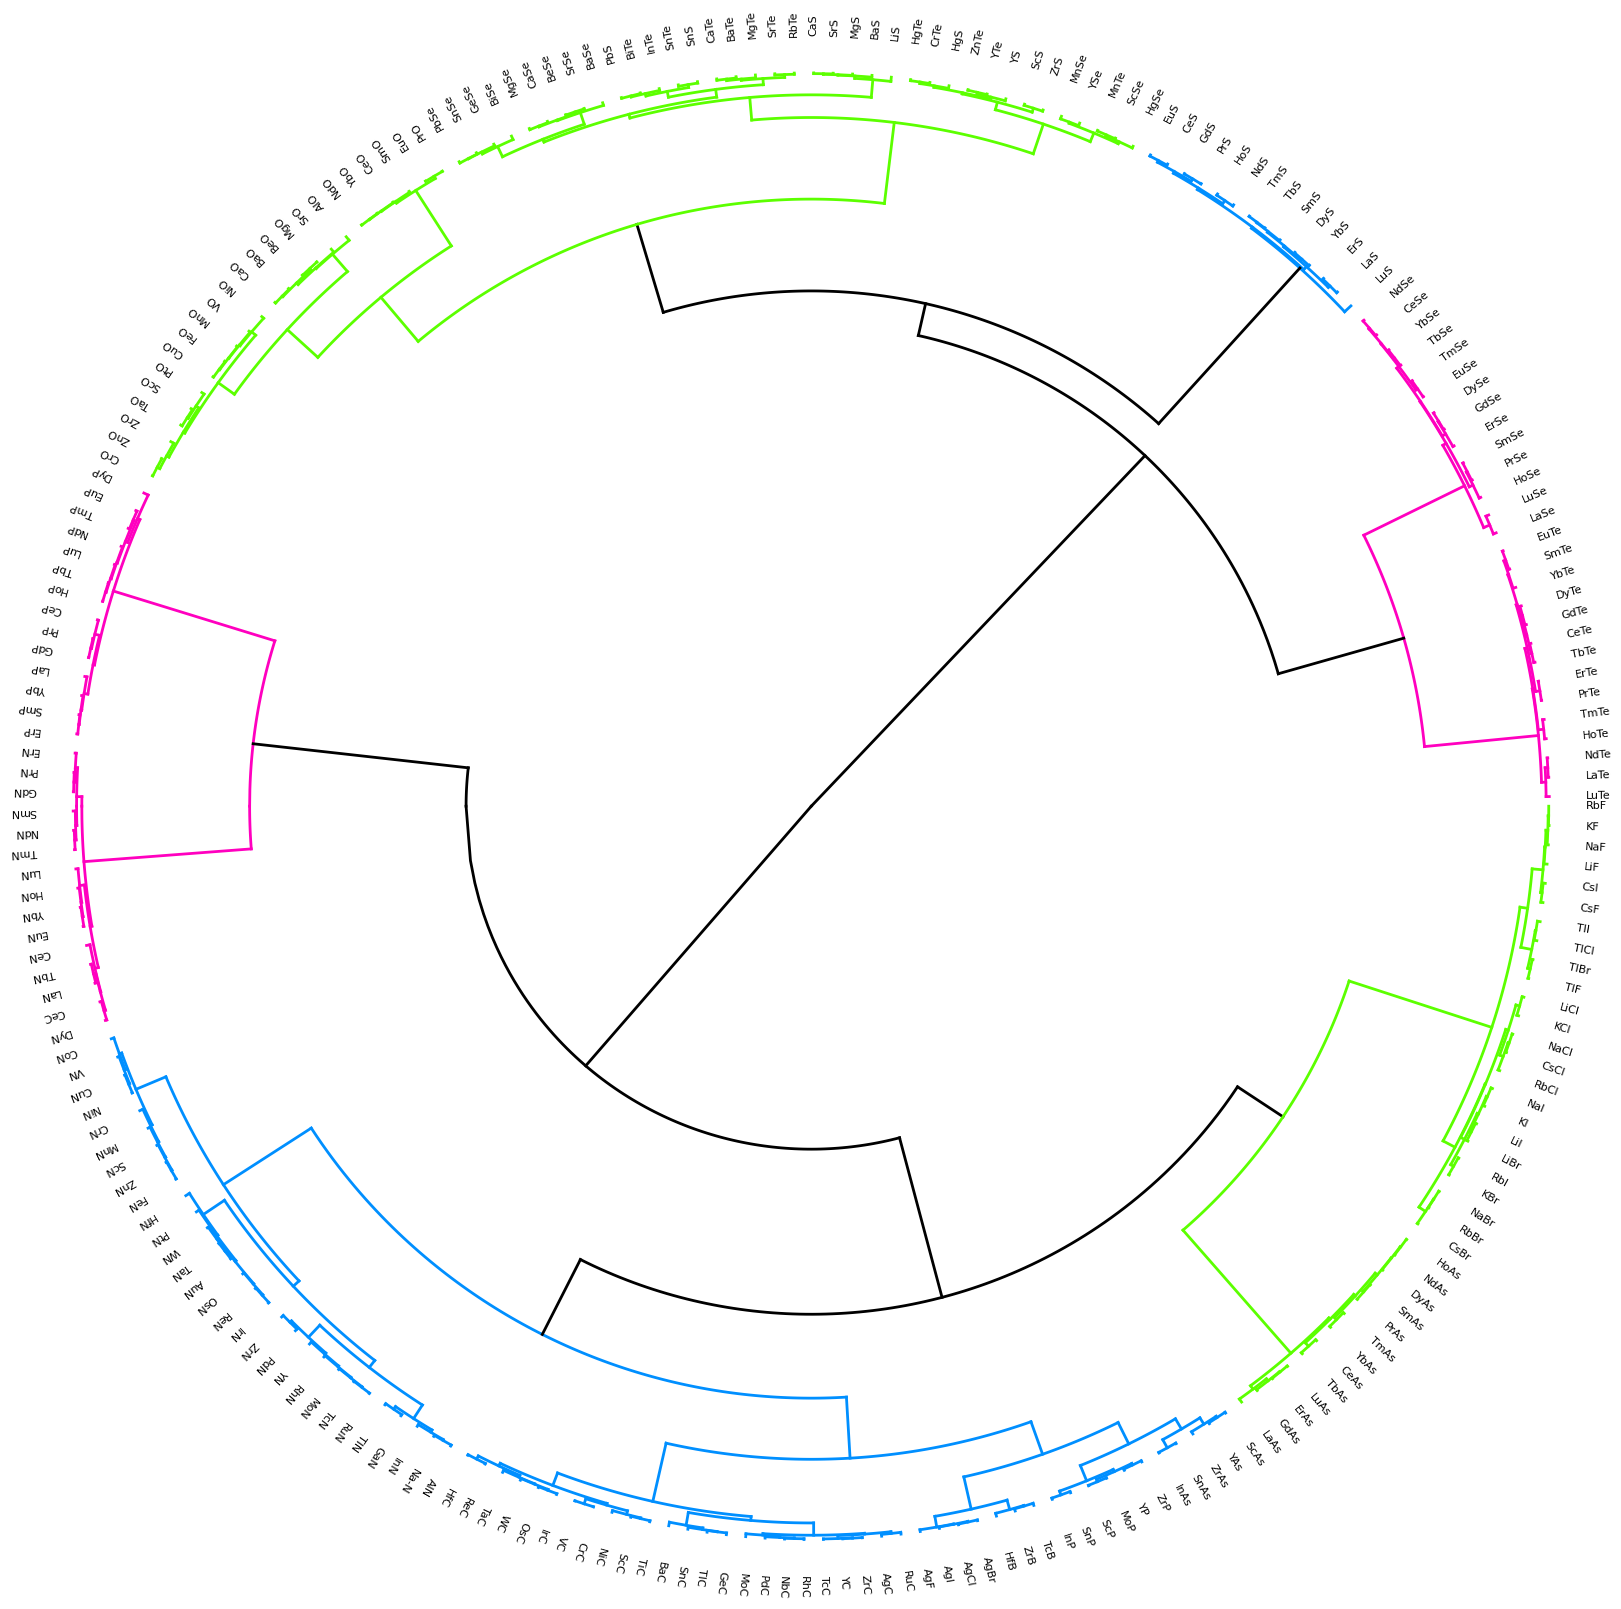

In [7]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster import hierarchy
import radialtree as rt

fig, axes = plt.subplots(figsize=(20, 20))

# Calculate the distance between each sample
# Several methods can be used: single, complete, average, ward, centroid, weighted
Z = linkage(df_embedding, method='ward')

# Set the colour of the cluster here
hierarchy.set_link_color_palette(['red', 'green', 'blue'])

# Make the dendrogram and give the colour above threshold
dendrogram = hierarchy.dendrogram(Z, labels=df_embedding.index, color_threshold=20, no_plot=True)

# Plot the radial tree using the custom module
rt.radialTree(dendrogram, ax=axes)

##### Use k-means from scikit-learn to cluster the umap_coords obtained in the previous step. 

In [25]:
kmeans = KMeans(n_clusters=4, init="k-means++").fit(umap_coords)
kmeans.labels_

c:\Users\it08d\.conda\envs\eda_f2023\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\it08d\.conda\envs\eda_f2023\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 1, 1, 0, 0, 0, 0,
       0, 3, 1, 1, 1, 0, 1, 0, 0, 0, 3, 1, 1, 1, 2, 2, 3, 0, 1, 1, 2, 3,
       2, 3, 0, 1, 1, 2, 2, 3, 0, 1, 1, 2, 2, 3, 2, 3, 0, 1, 1, 2, 3, 2,
       3, 0, 1, 1, 2, 3, 2, 3, 0, 1, 1, 2, 3, 2, 3, 0, 1, 1, 2, 3, 2, 3,
       1, 1, 2, 2, 3, 0, 1, 1, 2, 2, 3, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2,
       2, 3, 0, 1, 1, 2, 2, 3, 0, 1, 1, 2, 2, 3, 0, 1, 1, 2, 2, 3, 0, 1,
       1, 0, 0, 0, 3, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 0, 3, 0, 0, 3, 1, 1, 3, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 1, 0, 0, 3, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0])

##### Attach the labels from clustering to df_embedding

In [26]:
df_embedding.loc[:,"labels"] = kmeans.labels_
df_embedding

,x_coors,y_coors,labels
compound,,,
CsF,1.324901,6.124044,0
CsCl,1.101633,6.761290,0
CsBr,1.382475,6.548462,0
CsI,1.197788,6.270951,0
KF,1.157841,5.970362,0
...,...,...,...
PbS,0.602689,9.472926,1
PbSe,-0.041518,9.250300,1
WC,4.547740,6.544492,0


##### Plot the clusters using scatterplot and kdeplot

c:\Users\it08d\.conda\envs\eda_f2023\lib\site-packages\seaborn\utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
c:\Users\it08d\.conda\envs\eda_f2023\lib\site-packages\seaborn\relational.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
c:\Users\it08d\.conda\envs\eda_f2023\lib\site-packages\seaborn\utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
c:\Users\it08d\.conda\envs\eda_f2023\lib\site-packages\seaborn\relational.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
c:\Users\it08d\.conda\envs\eda_f2023\lib\site-packages\seaborn\utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be i

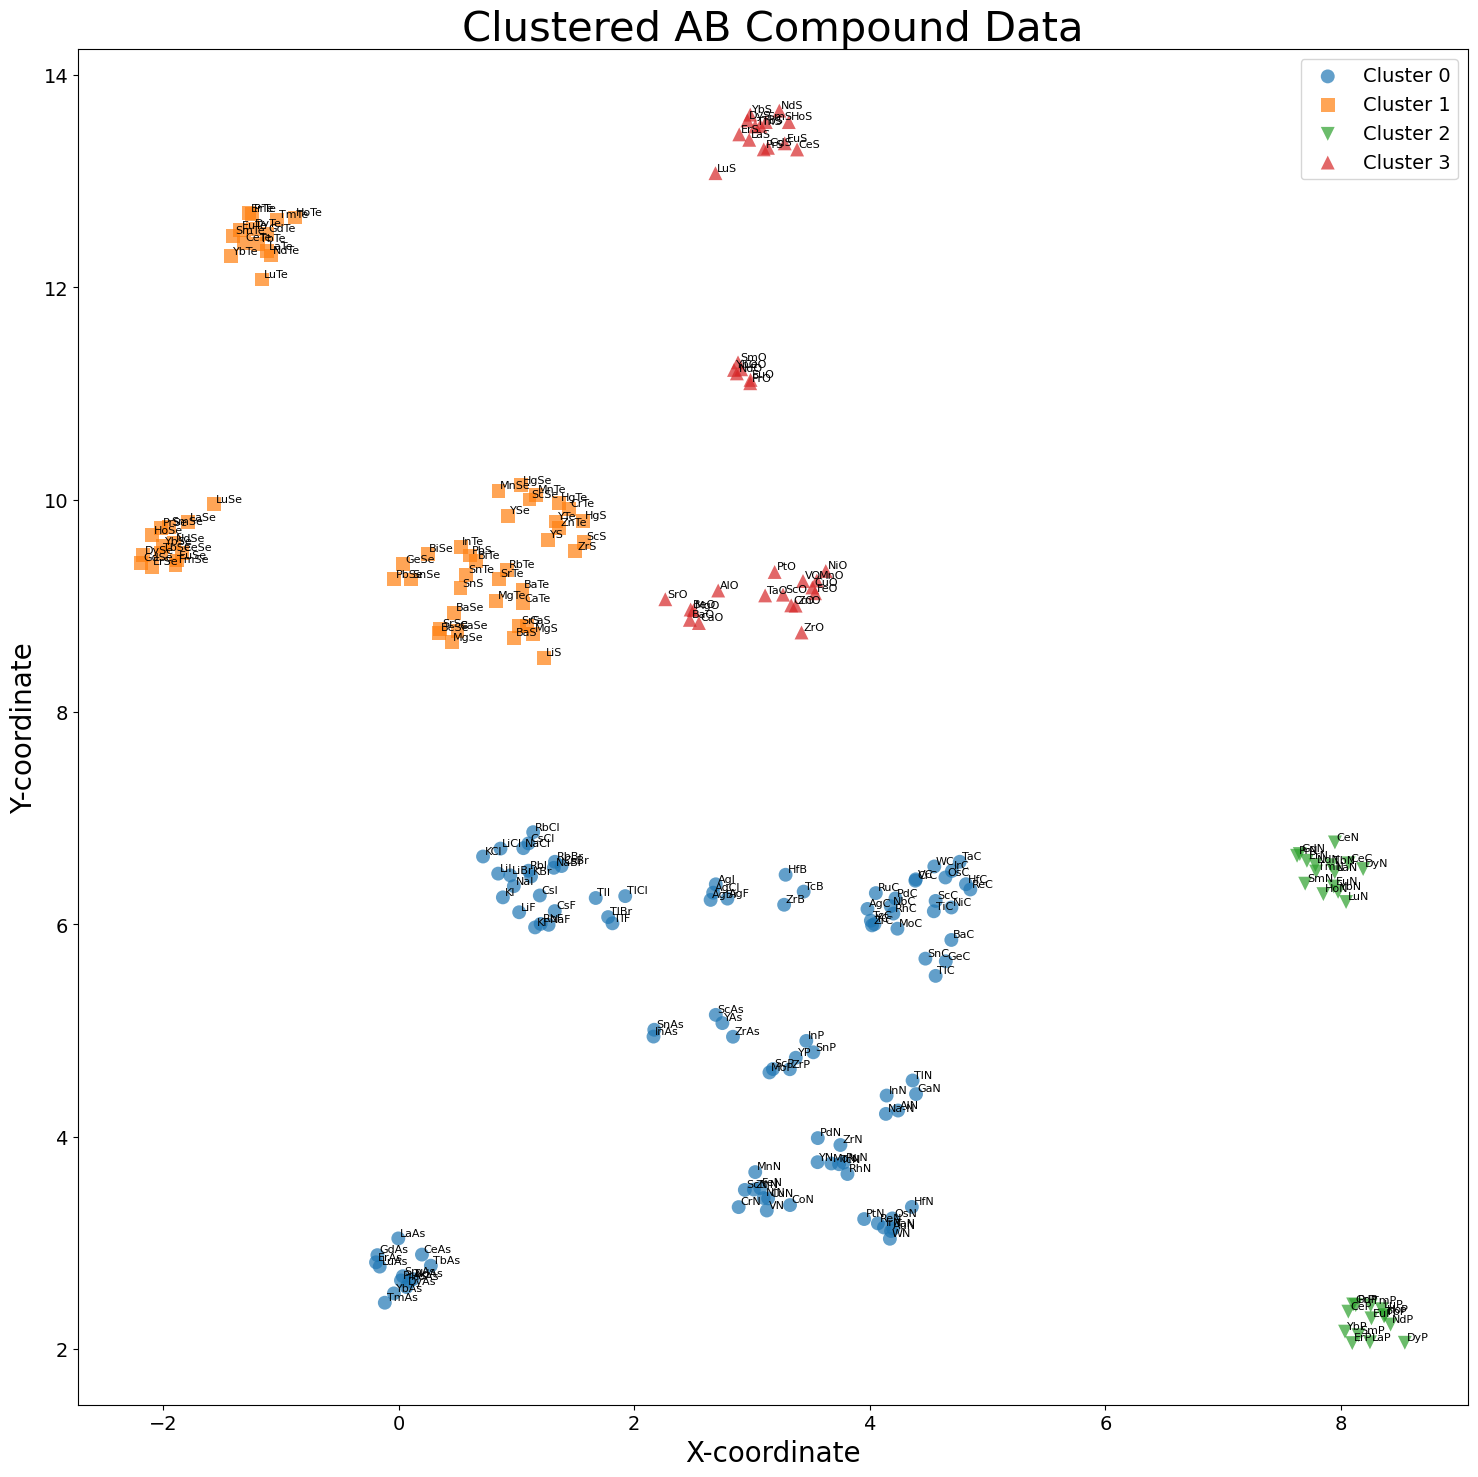

In [27]:
plt.rcParams['figure.figsize'] = [15, 15]
fig, ax = plt.subplots()

# Define the colors and markers for each class
colors = ['red', 'blue', 'green', 'purple']
markers = ['o', 's', 'v', '^']

# Visualize the clusters using scatter plots with specified markers and sizes
for i in range(len(df_embedding.labels.unique())):
    df_cluster = df_embedding[df_embedding['labels'] == i]
    sns.scatterplot(data=df_cluster, x='x_coors', y='y_coors', s=100, edgecolor='none', cmap=colors[i], marker=markers[i], label=f'Cluster {i}', alpha=0.7)

# Add text annotations to the data points
for ith, row in df_embedding.iterrows():
    x = df_embedding.loc[ith, "x_coors"]
    y = df_embedding.loc[ith, "y_coors"]
    ax.text(x + 0.015, y + 0.025, str(ith), size=8, zorder=1, color='black')

plt.title("Clustered AB Compound Data", fontsize=30)
plt.xlabel("X-coordinate", fontsize=20)
plt.ylabel("Y-coordinate", fontsize=20)
plt.legend()
plt.tight_layout()

In [28]:
conda install -c conda-forge numpy-stl

Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\it08d\.conda\envs\eda_f2023

  added / updated specs:
    - numpy-stl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numpy-stl-3.1.1            |   py39hd88c2e4_0          54 KB  conda-forge
    python-utils-3.8.2         |     pyhd8ed1ab_0          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          82 KB

The following NEW packages will be INSTALLED:

  numpy-stl          conda-forge/win-64::numpy-stl-3.1.1-py39hd88c2e4_0
  python-utils       conda-forge/noarch::python-utils-3.8.2-pyhd8ed1ab_0




python-utils-3.8.2   | 28 KB     |            |   0% 
python-utils-3.8.2   | 28 KB     | #####7     |  58% 
python-utils-3.8.2   | 28 KB     | ########## | 100% 
python-utils-3.8.2   | 28 KB     | ##########



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [ ]:
conda install scikit-image



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\it08d\.conda\envs\eda_f2023

  added / updated specs:
    - scikit-image


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aom-3.6.0                  |       hd77b12b_0         9.1 MB
    blosc-1.21.5               |       hdccc3a2_0          49 KB  conda-forge
    brotli-1.0.9               |       ha925a31_2         332 KB
    bzip2-1.0.8                |       hcfcfb64_5         122 KB  conda-forge
    cfitsio-3.470              |       h2bbff1b_7         518 KB
    charls-2.2.0               |       h6c2663c_0          82 KB
    dav1d-1.2.1                |       hcfcfb64_0         604 KB  conda-forge
    giflib-5.2.1               |       h64bf75a_3          82 KB  conda-forge
    imagecodecs-2023.1.23      |   py39h6c6a46e_0         8.9 MB
    imageio-2.33.1             |     pyh8c1a49c_0 

In [12]:
from skimage import measure
from stl import mesh
import os, glob, sys
import numpy as np


threshold = 0.0005
slices = sorted(glob.glob("{0}/*.txt".format("3D_sample")))
# Traverse all slices of a particle.
all_slices = []
for slice in slices:
    array = np.loadtxt(slice)
    all_slices.append(array)
slices_3D = np.stack(all_slices, axis = 0)

vertices, faces, normals, values = measure.marching_cubes(slices_3D, level=threshold)
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]
# Write the mesh to file "cube.stl"
cube.save("3D_sample.stl")      